In [1]:
import glob
import os

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io
from helpers.cell_type_naming import nice_to_weirds, weird_to_nice

plotly.io.renderers.default = "jupyterlab+png"

# Setup...

## Load sc data

In [2]:
sc_rna_seq = pd.read_csv(
    "/mnt/buckets/liulab/ftp/GSE115978/GSE115978_tpm.csv",
    index_col=0,
).rename_axis(index="GeneSymbol", columns="cells")

g = len(sc_rna_seq)

sc_rna_seq

cells,cy78_CD45_neg_1_B04_S496_comb,cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb,CY88_5_B10_S694_comb,cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb,cy78_CD45_neg_3_H06_S762_comb,cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_G01_S73_comb,cy79_p1_CD45_neg_PDL1_neg_AS_C4_R1_D09_S141_comb,CY88_3_D02_S614_comb,cy79_p1_CD45_neg_PDL1_neg_AS_C4_R1_D06_S138_comb,cy53_1_CD45_neg_C06_S318_comb,...,monika_C11_S119_comb_BCD8_3,CY75_1_CD45_CD8_8__S331_comb_BCD8,CY75_1_CD45_CD8_7__S210_comb_BCD8,CY75_1_CD45_CD8_3__S142_comb_BCD8,CY75_1_CD45_CD8_7__S280_comb_BCD8,CY75_1_CD45_CD8_3__S168_comb_BCD8,CY75_1_CD45_CD8_8__S338_comb_BCD8,monika_D7_S132_comb_BCD8_3,CY75_1_CD45_CD8_8__S289_comb_BCD8,CY75_1_CD45_CD8_8__S351_comb_BCD8
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
C9orf152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RPS11,8.144184,5.915091,7.243164,6.019502,7.974753,5.557257,4.639058,7.655502,3.554834,8.791371,...,8.116349,5.756490,0.000000,5.258820,3.930454,5.945186,6.661408,6.792322,0.000000,4.820741
ELMO2,2.639232,0.000000,0.732052,3.687956,2.599318,1.691087,2.019346,0.136191,0.000000,1.724650,...,1.580145,0.000000,1.075875,0.000000,5.616211,0.000000,0.000000,0.000000,0.000000,6.166655
CREB3L1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PNMA1,3.656496,0.000000,0.536053,3.041418,4.132741,2.827006,0.000000,2.873420,0.000000,4.787694,...,0.000000,1.407081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PIK3IP1,0.936591,5.761498,0.000000,0.000000,2.034216,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.018011,0.000000,1.491597,0.000000,0.000000,4.510139
SNRPD2,5.374866,0.000000,5.437661,6.240581,5.946754,4.628132,4.648580,4.330415,4.559981,5.664966,...,5.350462,0.000000,5.225853,3.966523,5.537203,6.792582,0.000000,0.000000,3.525944,6.218684
SLC39A6,3.326681,0.000000,1.308011,3.516141,3.868390,1.791189,0.000000,2.948601,4.368279,0.000000,...,0.000000,4.774840,4.881518,5.688656,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


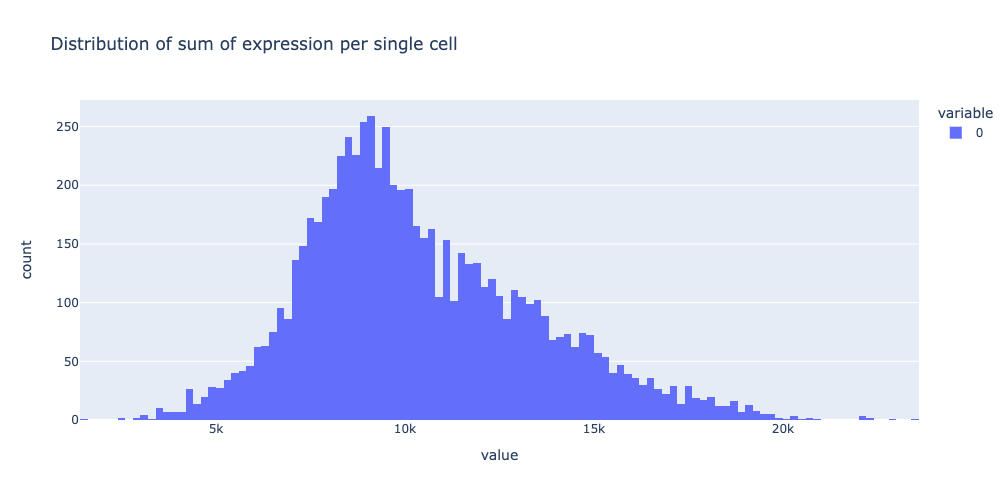

In [3]:
px.histogram(
    sc_rna_seq.sum(axis="index"),
    title="Distribution of sum of expression per single cell",
)

## Select genes to study

From Liu et al, 2019:

"We then examined the expression of antigen-presentation molecules and their association with response. Interestingly, expression of all 13 MHC-II-associated HLA genes was higher in responders (collective two-sided binomial test, P = 0.0002; Fig. 2g), with four genes (HLA-DMA, HLA-DMB, HLA-DOB and HLA-DOB) individually passing a statistical significance threshold (MWW, P < 0.05; Supplementary Table 4)."

What HLA genes are in the Jerby-Arnon cohort?

In [4]:
gene_regex = "HLA-D.*"

example_genes = list(sorted(sc_rna_seq.index[sc_rna_seq.index.str.match(gene_regex)]))

print(example_genes)

sc_rna_seq.loc[example_genes]

['HLA-DMA', 'HLA-DMB', 'HLA-DOA', 'HLA-DOB', 'HLA-DPA1', 'HLA-DPB1', 'HLA-DPB2', 'HLA-DQA1', 'HLA-DQA2', 'HLA-DQB1', 'HLA-DQB2', 'HLA-DRA', 'HLA-DRB1', 'HLA-DRB5', 'HLA-DRB6']


cells,cy78_CD45_neg_1_B04_S496_comb,cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb,CY88_5_B10_S694_comb,cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb,cy78_CD45_neg_3_H06_S762_comb,cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_G01_S73_comb,cy79_p1_CD45_neg_PDL1_neg_AS_C4_R1_D09_S141_comb,CY88_3_D02_S614_comb,cy79_p1_CD45_neg_PDL1_neg_AS_C4_R1_D06_S138_comb,cy53_1_CD45_neg_C06_S318_comb,...,monika_C11_S119_comb_BCD8_3,CY75_1_CD45_CD8_8__S331_comb_BCD8,CY75_1_CD45_CD8_7__S210_comb_BCD8,CY75_1_CD45_CD8_3__S142_comb_BCD8,CY75_1_CD45_CD8_7__S280_comb_BCD8,CY75_1_CD45_CD8_3__S168_comb_BCD8,CY75_1_CD45_CD8_8__S338_comb_BCD8,monika_D7_S132_comb_BCD8_3,CY75_1_CD45_CD8_8__S289_comb_BCD8,CY75_1_CD45_CD8_8__S351_comb_BCD8
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
HLA-DMA,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,3.968552,0.000000,4.423040,0.000000,0.000000,0.000000,0.000000,0.000000
HLA-DMB,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,6.343710,0.000000,0.000000,0.000000,6.093771,0.000000
HLA-DOA,0.178874,0.0,0.422233,0.0,0.329985,0.0,0.000000,0.205393,0.0,0.0,...,0.512985,0.000000,1.182692,0.000000,0.000000,1.198494,0.000000,0.321928,0.000000,0.000000
HLA-DOB,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HLA-DPA1,0.000000,0.0,0.000000,0.0,0.000000,0.0,4.610818,0.000000,0.0,0.0,...,0.000000,5.900239,6.451310,0.000000,2.123335,6.418527,6.808784,5.768555,0.000000,6.572010
HLA-DPB1,0.633199,0.0,0.000000,0.0,1.292782,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,2.036327,0.000000,4.534995,3.680549,3.219711,0.000000
HLA-DPB2,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.631337,0.000000,0.000000,0.000000
HLA-DQA1,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,3.961716,0.000000,0.000000,0.000000,0.000000,0.000000,5.054848,0.000000
HLA-DQA2,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,2.991499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


how often is expression of each HLA gene detected in single cells in the Jerby-Arnon cohort?

In [5]:
(sc_rna_seq.loc[example_genes] != 0).mean(axis=1).sort_values(ascending=False)

GeneSymbol
HLA-DOA     0.604926
HLA-DPA1    0.547871
HLA-DPB1    0.544392
HLA-DRB1    0.514194
HLA-DRB5    0.473421
HLA-DRA     0.444197
HLA-DRB6    0.437517
HLA-DQB1    0.374756
HLA-DMA     0.364459
HLA-DQA1    0.317701
HLA-DQA2    0.265934
HLA-DQB2    0.239076
HLA-DMB     0.224603
HLA-DPB2    0.151684
HLA-DOB     0.090315
dtype: float64

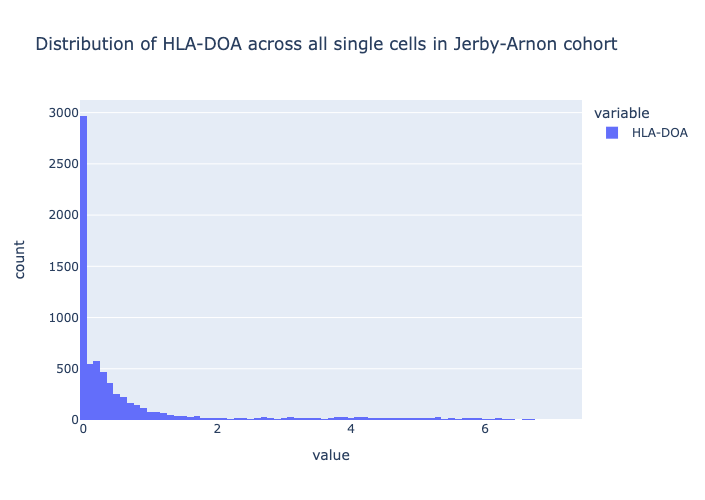

In [6]:
px.histogram(
    sc_rna_seq.loc["HLA-DOA"],
    title="Distribution of HLA-DOA across all single cells in Jerby-Arnon cohort",
)

## load in silico data

In [56]:
# PARAM
results_dir = "./5d_results_noise_0.01/"

In [57]:
!ls $results_dir

group_mode  hires


In [58]:
base_path = os.path.abspath(os.path.join(results_dir, "group_mode"))

In [59]:
!tree -h $base_path

/home/jupyter/deconv/5d_results_noise_0.01/group_mode
├── [2.7M]  CIBERSORTxGEP_GEPs.txt
├── [3.5M]  CIBERSORTxGEP_GEPs_CVs.txt
├── [2.3M]  CIBERSORTxGEP_GEPs_Filtered.txt
├── [3.1M]  CIBERSORTxGEP_GEPs_Pvals.txt
├── [2.7M]  CIBERSORTxGEP_GEPs_Qvals.txt
├── [3.4M]  CIBERSORTxGEP_GEPs_StdErrs.txt
├── [555K]  CIBERSORTxGEP_GEPs_ThresholdPlots.pdf
├── [2.3M]  CIBERSORTxGEP_SM_GEPs_Filtered.txt
├── [6.7K]  CIBERSORTxGEP_Weights.txt
├── [5.8K]  fractions_known_and_empty_csx_metrics.txt
└── [4.0K]  in
    ├── [2.2M]  dummy_geps.txt
    └── [ 31M]  mixtures_computed.txt

1 directory, 12 files


### sample mixtures and fractions

In [60]:
mixtures_in_silico = pd.read_csv(
    os.path.join(base_path, "in", "mixtures_computed.txt"), sep="\t", index_col=0
)

In [61]:
fractions_in_silico = pd.read_csv(
    os.path.join(base_path, "fractions_known_and_empty_csx_metrics.txt"),
    sep="\t",
    index_col=0,
).iloc[:, :-3]

### cell-type GEPs per sample

In [62]:
samples = mixtures_in_silico.columns
cell_types = fractions_in_silico.columns

In [63]:
sc_rna_seq_metadata = pd.read_csv(
    "gs://liulab/ftp/GSE115978/GSE115978_cell.annotations.csv",
).replace({"cell.types": weird_to_nice})

In [64]:
cell_type_single_cells = {
    cell_type: sc_rna_seq_metadata.set_index(["cell.types", "cells"])
    .loc[cell_type]
    .index.tolist()
    for cell_type in cell_types
}

In [65]:
n_cells_per_gep = 5  # PARAM
# note - increasing this param increases the correlation between sample GEPs per cell type

rng = np.random.default_rng(seed=0)


def make_a_cell_type_gep(cell_type, n_cells_per_gep=5):
    # sample with replacement from single cell data
    sampled_cells = rng.choice(cell_type_single_cells[cell_type], n_cells_per_gep)
    gep = sc_rna_seq[sampled_cells].mean(axis="columns")
    gep *= 100000 / gep.sum()
    return gep


sample_cell_type_geps = pd.concat(
    {
        sample: pd.DataFrame(
            {
                cell_type: make_a_cell_type_gep(cell_type, n_cells_per_gep)
                for cell_type in cell_types
            }
        )
        for sample in samples
    }
).rename_axis(columns="cell_type")

In [66]:
sample_cell_type_geps

cell_type                      B        CAF  Endothelial  Macrophage  \
           GeneSymbol                                                  
sample_000 C9orf152     0.000000   0.000000     0.000000    0.000000   
           RPS11       93.816258  53.313483    53.516824   63.651543   
           ELMO2        8.408418   4.196476     0.000000    9.479460   
           CREB3L1      0.000000   3.528394     0.000000    0.000000   
           PNMA1        0.000000   7.129496     0.000000   10.595397   
...                          ...        ...          ...         ...   
sample_099 PIK3IP1     23.716328   9.386941    12.227121   10.196701   
           SNRPD2      22.332987  36.335604    23.037060   24.116396   
           SLC39A6      0.000000   7.024601     2.172527    0.456731   
           CTSC        14.836136  21.366938    21.087523   50.712171   
           AQP7         0.000000   0.000000     0.000000    0.000000   

cell_type              Malignant         NK      T CD4      T CD8     T.cell  
           GeneSymbol                                                         
sample_000 C9orf152     0.000000   0.000000   0.000000   0.000000   0.000000  
           RPS11       47.819273  68.389910  80.802680  70.155542  80.431608  
           ELMO2        8.411707   4.012140   0.000000   0.000000   0.000000  
           CREB3L1      0.000000   0.000000   0.000000   0.000000   0.000000  
           PNMA1        6.471376   0.000000  21.576479   0.000000   0.000000  
...                          ...        ...        ...        ...        ...  
sample_099 PIK3IP1      5.866825  59.486713  49.675969  17.586380  26.995471  
           SNRPD2      32.215756  31.198037  58.317783  43.346368  18.968989  
           SLC39A6     18.572938   0.000000  10.260685   0.000000   2.905304  
           CTSC        18.656793  23.269415  18.724944  38.545707  26.495049  
           AQP7         0.000000   0.000000   0.000000   0.000000   0.000000  

[2368600 rows x 9 columns]

# Imputation of "global" gene expression by cell type

## Estimated by CIBERSORTx

In [67]:
base_path = os.path.abspath(os.path.join(results_dir, "group_mode"))

In [68]:
example_genes_csx = list(_.replace("-", ".") for _ in example_genes)
example_genes_csx

['HLA.DMA',
 'HLA.DMB',
 'HLA.DOA',
 'HLA.DOB',
 'HLA.DPA1',
 'HLA.DPB1',
 'HLA.DPB2',
 'HLA.DQA1',
 'HLA.DQA2',
 'HLA.DQB1',
 'HLA.DQB2',
 'HLA.DRA',
 'HLA.DRB1',
 'HLA.DRB5',
 'HLA.DRB6']

### GEPs

In [73]:
imputed_geps_csx = pd.read_csv(
    os.path.join(base_path, "CIBERSORTxGEP_GEPs.txt"),
    sep="\t",
    index_col=0,
)

In [74]:
imputed_geps_csx.loc[example_genes_csx]

,B,CAF,Endothelial,Macrophage,Malignant,NK,T CD4,T CD8,T.cell
GeneSymbol,,,,,,,,,
HLA.DMA,56.973560,1.000000,16.387134,59.746354,1.000000,1.000000,1.000000,26.623550,1.000000
HLA.DMB,51.081968,1.000000,12.293182,46.881373,1.000000,9.610010,1.000000,1.000000,1.000000
HLA.DOA,24.372956,1.000000,1.000000,14.696519,5.061734,4.917648,4.921660,1.000000,4.790709
HLA.DOB,27.577177,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
HLA.DPA1,95.955435,1.000000,27.212318,70.585783,1.000000,18.505263,19.678227,53.113119,23.037799
HLA.DPB1,67.406185,1.000000,23.216824,52.892025,1.000000,17.519967,13.285151,38.308175,13.638827
HLA.DPB2,6.172753,1.416973,0.169097,9.477557,0.000000,1.322960,1.321267,1.846572,0.692792
HLA.DQA1,63.035626,1.000000,1.000000,48.321319,1.000000,1.000000,1.000000,19.085579,1.000000
HLA.DQA2,46.136453,1.000000,1.000000,20.654627,1.000000,1.000000,1.000000,9.449205,1.000000


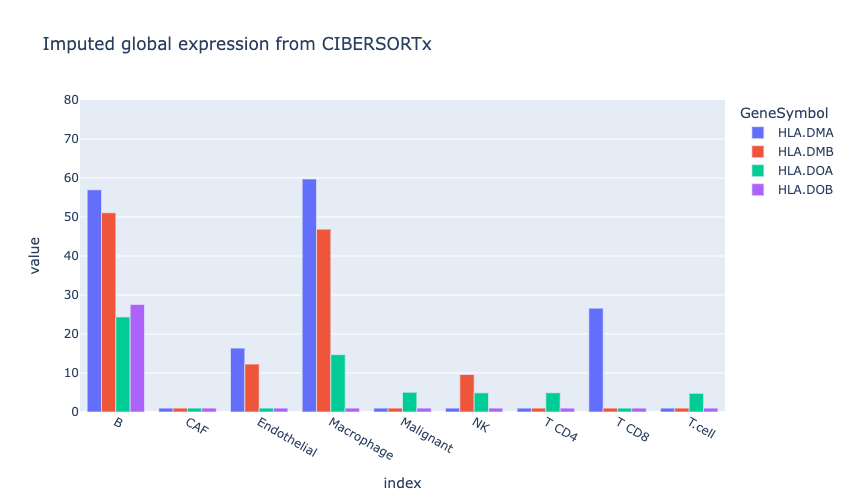

In [75]:
fig = px.bar(
    imputed_geps_csx.loc[example_genes_csx[0:4]].T,
    barmode="group",
    title="Imputed global expression from CIBERSORTx",
)
fig.update_yaxes(range=[0, 80])

### p-values, q-values by cell type

In [69]:
pvals = pd.read_csv(
    os.path.join(base_path, "CIBERSORTxGEP_GEPs_Pvals.txt"),
    sep="\t",
    index_col=0,
)

In [70]:
pvals.loc[example_genes_csx].round(6)

,B,CAF,Endothelial,Macrophage,Malignant,NK,T CD4,T CD8,T.cell
GeneSymbol,,,,,,,,,
HLA.DMA,0.000000,0.901629,0.072096,0.000006,0.534342,0.279638,0.467289,0.000139,0.155051
HLA.DMB,0.000000,1.000000,0.060939,0.000001,1.000000,0.090814,0.578077,0.121158,1.000000
HLA.DOA,0.000000,1.000000,0.238090,0.001588,0.112217,0.087370,0.082926,0.198323,0.092678
HLA.DOB,0.000000,0.726060,0.797736,0.364766,0.886101,0.712310,0.817358,1.000000,0.363133
HLA.DPA1,0.000000,0.793209,0.032229,0.000090,0.524431,0.091738,0.069437,0.000000,0.034888
HLA.DPB1,0.000000,0.894820,0.009900,0.000034,0.761295,0.024274,0.081579,0.000000,0.075133
HLA.DPB2,0.000313,0.424571,0.908164,0.000009,1.000000,0.299772,0.293827,0.092614,0.582806
HLA.DQA1,0.000000,0.671848,0.411075,0.000407,1.000000,0.488870,0.622675,0.008606,0.210822
HLA.DQA2,0.000000,0.651932,0.687539,0.010070,0.934198,0.460759,0.513802,0.028419,0.201876


In [71]:
qvals = pd.read_csv(
    os.path.join(base_path, "CIBERSORTxGEP_GEPs_Qvals.txt"),
    sep="\t",
    index_col=0,
)

In [72]:
qvals.loc[example_genes_csx].round(6)

,B,CAF,Endothelial,Macrophage,Malignant,NK,T CD4,T CD8,T.cell
GeneSymbol,,,,,,,,,
HLA.DMA,0.000006,1.000000,0.164131,0.000193,0.839346,0.526800,0.786589,0.000658,0.327475
HLA.DMB,0.000000,1.000000,0.143092,0.000046,1.000000,0.212578,0.917047,0.257045,1.000000
HLA.DOA,0.000000,1.000000,0.435158,0.016472,0.246827,0.205900,0.196849,0.391390,0.216245
HLA.DOB,0.000000,1.000000,1.000000,0.769179,1.000000,1.000000,1.000000,1.000000,0.641259
HLA.DPA1,0.000000,1.000000,0.085265,0.001740,0.827928,0.214229,0.169758,0.000001,0.096966
HLA.DPB1,0.000000,1.000000,0.032331,0.000800,1.000000,0.070216,0.194101,0.000001,0.182341
HLA.DPB2,0.002585,0.711920,1.000000,0.000274,1.000000,0.556550,0.553900,0.203748,0.911476
HLA.DQA1,0.000002,0.989393,0.670649,0.005796,1.000000,0.811236,0.965928,0.025453,0.417701
HLA.DQA2,0.000000,0.968243,0.986768,0.066316,1.000000,0.777162,0.842938,0.072560,0.403733


## Estimated by scipy.optimize.nnls

In [76]:
import scipy.optimize

In [205]:
def estimate_expression_by_cell_type(gene):
    expression_by_cell_type, error = scipy.optimize.nnls(
        A=fractions_in_silico, b=mixtures_in_silico.loc[gene]
    )
    return expression_by_cell_type

In [206]:
genes_to_impute = mixtures_in_silico.index

imputed_expression = map(estimate_expression_by_cell_type, genes_to_impute)

Init signature: map(self, /, *args, **kwargs)
Docstring:     
map(func, *iterables) --> map object

Make an iterator that computes the function using arguments from
each of the iterables.  Stops when the shortest iterable is exhausted.
Type:           type
Subclasses:     


In [77]:
%%time


dict_imputed_geps_scipy = {
    gene: scipy.optimize.nnls(A=fractions_in_silico, b=mixtures_in_silico.loc[gene])[0]
    for gene in mixtures_in_silico.index
}

imputed_geps_scipy = pd.DataFrame.from_dict(
    dict_imputed_geps_scipy, orient="index", columns=fractions_in_silico.columns
)

CPU times: user 3.11 s, sys: 7.61 ms, total: 3.12 s
Wall time: 3.11 s


In [78]:
imputed_geps_scipy.loc[example_genes]

,B,CAF,Endothelial,Macrophage,Malignant,NK,T CD4,T CD8,T.cell
HLA-DMA,56.880589,1.410820,15.830458,59.431507,5.181621,9.308012,6.088353,25.257855,11.406724
HLA-DMB,50.518897,0.000000,13.496369,47.673015,0.000000,9.342192,2.938967,7.750288,0.000000
HLA-DOA,24.733773,0.000000,3.920117,15.449584,5.002056,5.232554,4.978331,3.294392,4.795519
HLA-DOB,28.090550,1.558086,1.004560,4.469937,0.353624,0.914058,0.461914,0.012648,2.882365
HLA-DPA1,94.503218,4.315514,27.270564,71.038857,7.690448,18.873182,19.988109,53.342624,22.595027
HLA-DPB1,67.289232,1.181982,22.555016,54.228019,2.324442,17.150894,13.156744,38.021195,13.759245
HLA-DPB2,6.036083,1.394532,0.263530,9.573609,0.000000,1.109599,1.217439,1.758775,0.892477
HLA-DQA1,62.547563,5.737314,8.416389,49.153030,0.000000,5.397720,3.935997,18.896637,10.350074
HLA-DQA2,44.748763,3.641922,2.120743,21.139589,0.759512,4.015647,3.180784,9.638469,6.588334
HLA-DQB1,69.802887,2.134332,12.900151,56.149709,2.832060,5.621612,7.825600,19.143226,13.300471


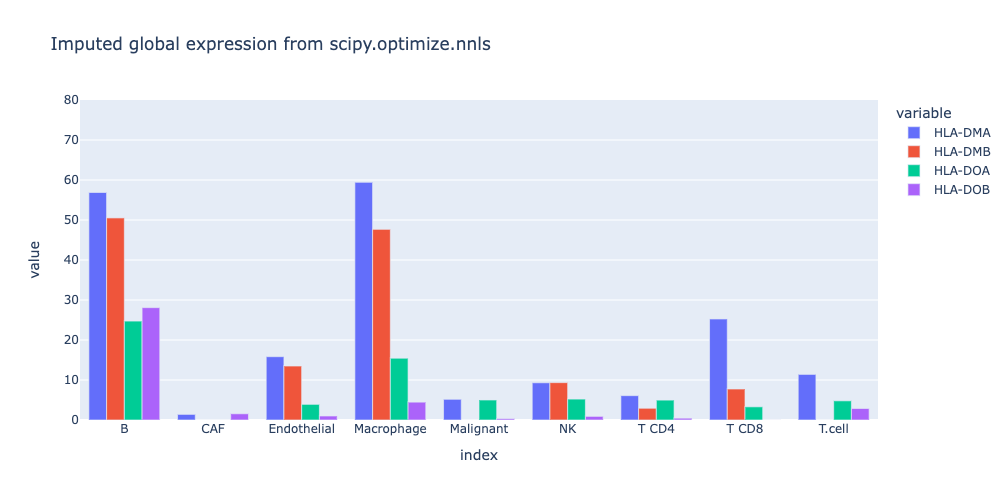

In [79]:
fig = px.bar(
    imputed_geps_scipy.loc[example_genes[0:4]].T,
    barmode="group",
    title="Imputed global expression from scipy.optimize.nnls",
)
fig.update_yaxes(range=[0, 80])

## Estimated by numpy.linalg.lstsq

In [80]:
%%time

dict_imputed_geps_numpy_lstsq = {
    gene: np.linalg.lstsq(a=fractions_in_silico, b=mixtures_in_silico.loc[gene])[0]
    for gene in mixtures_in_silico.index
}

imputed_geps_numpy_lstsq = pd.DataFrame.from_dict(
    dict_imputed_geps_numpy_lstsq, orient="index", columns=fractions_in_silico.columns
)

imputed_geps_numpy_lstsq = imputed_geps_numpy_lstsq.clip(lower=0)

CPU times: user 6.01 s, sys: 376 ms, total: 6.39 s
Wall time: 5.71 s


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



In [81]:
imputed_geps_numpy_lstsq.loc[example_genes]

,B,CAF,Endothelial,Macrophage,Malignant,NK,T CD4,T CD8,T.cell
HLA-DMA,56.880589,1.410820,15.830458,59.431507,5.181621,9.308012,6.088353,25.257855,11.406724
HLA-DMB,51.433238,0.000000,14.297849,48.300206,0.000000,9.647863,3.698668,8.136711,0.000000
HLA-DOA,24.798118,0.000000,3.978059,15.482768,5.041529,5.279576,5.055121,3.330953,4.823480
HLA-DOB,28.090550,1.558086,1.004560,4.469937,0.353624,0.914058,0.461914,0.012648,2.882365
HLA-DPA1,94.503218,4.315514,27.270564,71.038857,7.690448,18.873182,19.988109,53.342624,22.595027
HLA-DPB1,67.289232,1.181982,22.555016,54.228019,2.324442,17.150894,13.156744,38.021195,13.759245
HLA-DPB2,6.120381,1.465434,0.362396,9.809682,0.000000,1.121420,1.319087,1.807769,0.883659
HLA-DQA1,62.560869,5.748505,8.431994,49.190291,0.000000,5.399585,3.952041,18.904370,10.348682
HLA-DQA2,44.748763,3.641922,2.120743,21.139589,0.759512,4.015647,3.180784,9.638469,6.588334
HLA-DQB1,69.802887,2.134332,12.900151,56.149709,2.832060,5.621612,7.825600,19.143226,13.300471


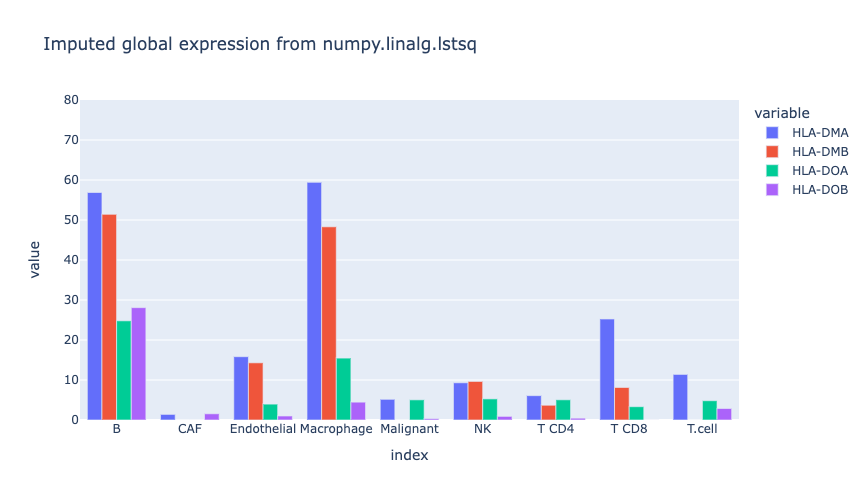

In [82]:
fig = px.bar(
    imputed_geps_numpy_lstsq.loc[example_genes[0:4]].T,
    barmode="group",
    title="Imputed global expression from numpy.linalg.lstsq",
)
fig.update_yaxes(range=[0, 80])

## True (average cell type GEP per sample)

In [83]:
true_geps_on_average = sample_cell_type_geps.groupby(level=1).mean()

In [84]:
true_geps_on_average.loc[example_genes]

cell_type,B,CAF,Endothelial,Macrophage,Malignant,NK,T CD4,T CD8,T.cell
GeneSymbol,,,,,,,,,
HLA-DMA,53.525467,2.468889,17.663601,55.835694,3.792860,11.857651,8.404640,21.812644,13.053024
HLA-DMB,46.155905,0.687386,8.519218,52.316484,1.381679,8.363619,2.950043,7.082578,3.720721
HLA-DOA,24.894596,1.637206,4.872018,19.920672,1.488807,4.067091,4.258936,6.284857,4.719538
HLA-DOB,34.282170,0.376104,0.655755,3.092496,0.392459,0.000000,0.643439,0.200269,1.946843
HLA-DPA1,87.375454,5.942572,29.797871,76.011675,8.734932,18.589929,20.685078,44.713072,23.586206
HLA-DPB1,62.469173,3.829746,19.076330,55.584342,3.825272,17.736455,13.968533,33.900404,16.098314
HLA-DPB2,6.293981,0.052028,0.496123,8.867020,0.194966,1.128011,0.707482,2.085904,1.218144
HLA-DQA1,59.457605,1.877694,9.753644,53.864606,0.742687,6.038145,4.715696,17.312747,10.546156
HLA-DQA2,41.243008,1.927981,5.774756,25.167408,0.653268,3.370111,2.383818,9.911465,7.137400


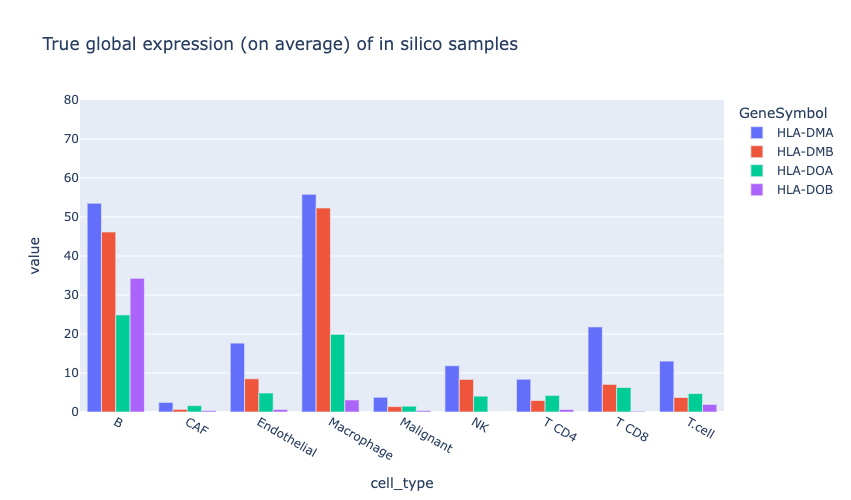

In [85]:
fig = px.bar(
    true_geps_on_average.loc[example_genes[0:4]].T,
    barmode="group",
    title="True global expression (on average) of in silico samples",
)
fig.update_yaxes(range=[0, 80])

# Imputation of sample-level, cell type-specific GEPs

## Estimated by CIBERSORTx

In [86]:
base_path = os.path.abspath(os.path.join(results_dir, "hires"))

In [87]:
!tree -h $base_path

/home/jupyter/deconv/5d_results_noise_0.01/hires
├── [ 46M]  CIBERSORTxHiRes_NA_B_Window36.txt
├── [ 46M]  CIBERSORTxHiRes_NA_CAF_Window36.txt
├── [ 46M]  CIBERSORTxHiRes_NA_Endothelial_Window36.txt
├── [103K]  CIBERSORTxHiRes_NA_Heatmap_B_Window36.png
├── [129K]  CIBERSORTxHiRes_NA_Heatmap_CAF_Window36.png
├── [141K]  CIBERSORTxHiRes_NA_Heatmap_Endothelial_Window36.png
├── [ 66K]  CIBERSORTxHiRes_NA_Heatmap_Macrophage_Window36.png
├── [134K]  CIBERSORTxHiRes_NA_Heatmap_Malignant_Window36.png
├── [153K]  CIBERSORTxHiRes_NA_Heatmap_NK_Window36.png
├── [154K]  CIBERSORTxHiRes_NA_Heatmap_T.cell_Window36.png
├── [162K]  CIBERSORTxHiRes_NA_Heatmap_TCD4_Window36.png
├── [185K]  CIBERSORTxHiRes_NA_Heatmap_TCD8_Window36.png
├── [ 46M]  CIBERSORTxHiRes_NA_Macrophage_Window36.txt
├── [ 46M]  CIBERSORTxHiRes_NA_Malignant_Window36.txt
├── [ 46M]  CIBERSORTxHiRes_NA_NK_Window36.txt
├── [ 46M]  CIBERSORTxHiRes_NA_T.cell_Window36.txt
├── [ 46M]  CIBERSORTxHiRes_NA_TCD4_Window36.txt
├── [ 46M]  CIBERS

In [88]:
inferred_cell_type_geps = dict()
standard_gene_index = sample_cell_type_geps["B"].loc["sample_000"].index

for path in glob.glob(os.path.join(base_path, "CIBERSORTxHiRes_NA_*_Window*txt")):
    file = os.path.basename(path)
    cell_type = file.split("_")[2]
    print(cell_type)
    df = pd.read_csv(path, sep="\t", index_col=0).rename_axis(columns="sample")
    # df = df.set_index(standard_gene_index)
    inferred_cell_type_geps[cell_type] = df

all_inferred_geps = (
    pd.concat(inferred_cell_type_geps, names=["cell_type"])
    .stack()
    .reset_index()
    .set_index(["sample", "GeneSymbol", "cell_type"])
    .unstack(level=-1)[0]
    .rename(columns=weird_to_nice)
)

CAF
TCD4
T.cell
Macrophage
NK
TCD8
Malignant
B
Endothelial


In [89]:
all_inferred_geps.loc[pd.IndexSlice[:, "HLA.DMB"], :]

,cell_type,B,CAF,Endothelial,Macrophage,Malignant,NK,T.cell,T CD4,T CD8
sample,GeneSymbol,,,,,,,,,
sample_000,HLA.DMB,42.006228,1.0,17.061532,49.049931,1.0,14.718684,1.0,1.0,14.837158
sample_001,HLA.DMB,42.017318,1.0,16.866233,49.049931,1.0,14.313837,1.0,1.0,15.619701
sample_002,HLA.DMB,40.781163,1.0,16.670337,49.049931,1.0,14.038736,1.0,1.0,14.644415
sample_003,HLA.DMB,41.149196,1.0,14.998804,49.049931,1.0,10.230692,1.0,1.0,10.712750
sample_004,HLA.DMB,41.470949,1.0,16.716925,49.049931,1.0,14.702743,1.0,1.0,14.562241
...,...,...,...,...,...,...,...,...,...,...
sample_095,HLA.DMB,41.653321,1.0,16.335086,49.049931,1.0,14.929406,1.0,1.0,15.085202
sample_096,HLA.DMB,41.967055,1.0,15.469233,49.049931,1.0,10.359216,1.0,1.0,9.083980
sample_097,HLA.DMB,42.748300,1.0,19.003465,49.049931,1.0,14.296550,1.0,1.0,15.373652


In [128]:
cells = ["B", "T CD8", "Endothelial", "Macrophage"]
gene = "HLA-DMB"
gene_csx = "HLA.DMB"
cell_type = "T CD8"

both = pd.concat(
    [
        all_inferred_geps.rename(index={gene_csx: gene})
        .loc[pd.IndexSlice[:, gene], cells]
        .stack(),
        sample_cell_type_geps.loc[pd.IndexSlice[:, gene], cells].stack(),
    ],
    axis=1,
).rename(columns={0: "CIBERSORTx", 1: "in silico known"})

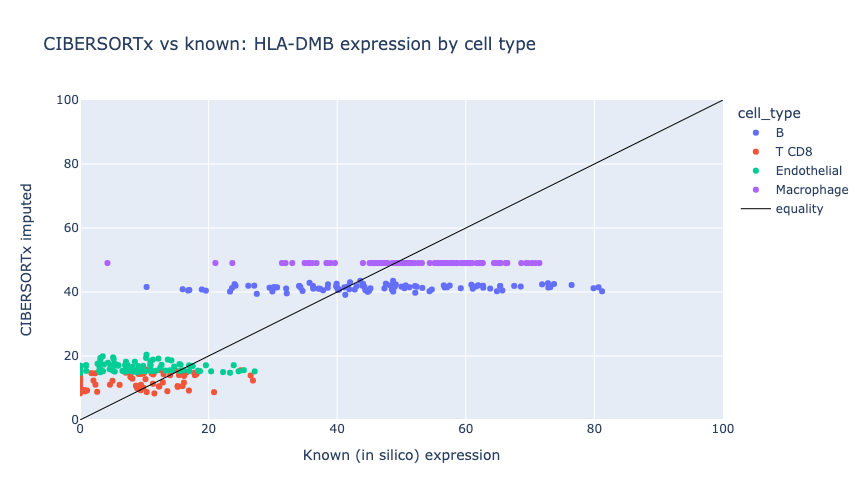

In [130]:
fig = px.scatter(
    both.reset_index(),
    x="in silico known",
    y="CIBERSORTx",
    color="cell_type",
    title=f"CIBERSORTx vs known: {gene} expression by cell type",
)
fig.add_trace(
    go.Scatter(
        x=[0, 100],
        y=[0, 100],
        mode="lines",
        line=dict(color="black", width=1),
        name="equality",
    )
)
fig.update_layout(
    xaxis_title="Known (in silico) expression",
    yaxis_title="CIBERSORTx imputed",
)
fig.update_yaxes(range=(0, 100))
fig.update_xaxes(range=(0, 100))

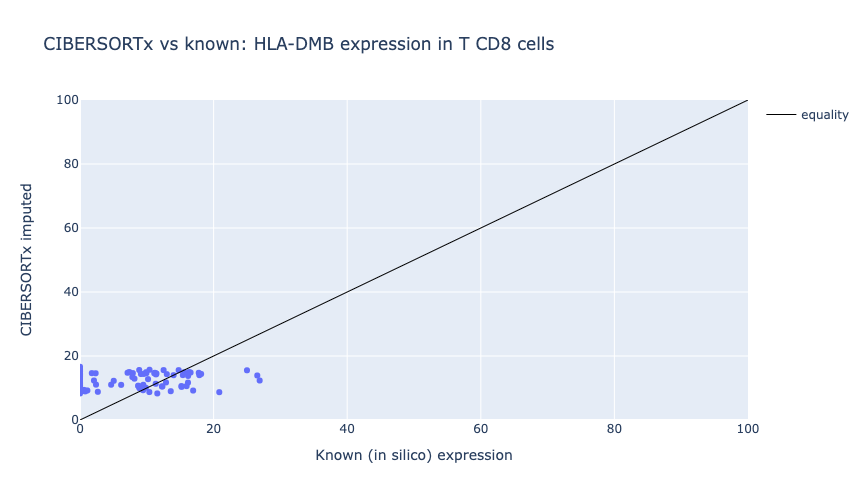

In [95]:
fig = px.scatter(
    x=sample_cell_type_geps.loc[pd.IndexSlice[:, gene], :][cell_type],
    y=all_inferred_geps.loc[pd.IndexSlice[:, gene_csx], :][cell_type],
    title=f"CIBERSORTx vs known: {gene} expression in {cell_type} cells",
)
fig.add_trace(
    go.Scatter(
        x=[0, 100],
        y=[0, 100],
        mode="lines",
        line=dict(color="black", width=1),
        name="equality",
    )
)
fig.update_layout(
    xaxis_title="Known (in silico) expression",
    yaxis_title="CIBERSORTx imputed",
)
fig.update_yaxes(range=(0, 100))
fig.update_xaxes(range=(0, 100))

## Reproduced

* Rank the bulk expression of HLA-DMB for each sample

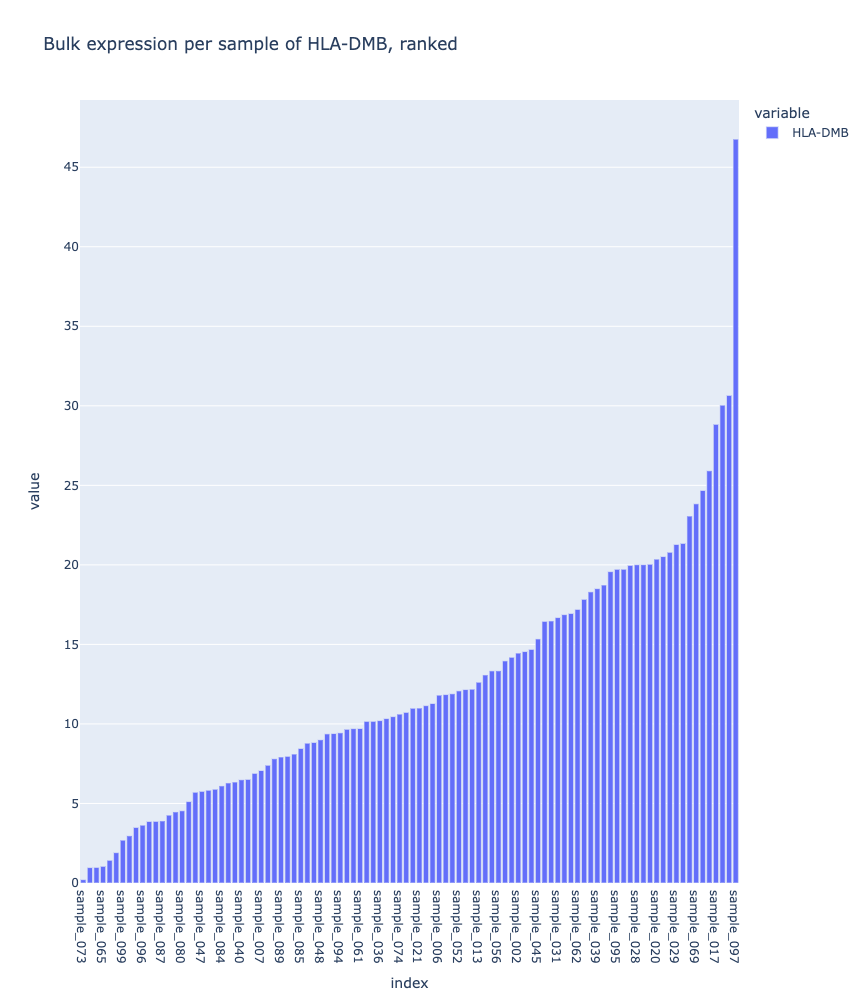

In [91]:
px.bar(
    mixtures_in_silico.loc[gene].sort_values(),
    title=f"Bulk expression per sample of {gene}, ranked",
)

In [143]:
mixtures_sorted = mixtures_in_silico.loc[gene].sort_values()

In [144]:
mixtures_sorted

sample_073     0.209319
sample_098     0.968898
sample_079     0.981398
sample_065     1.049599
sample_088     1.428608
                ...    
sample_025    25.911535
sample_017    28.837668
sample_023    30.040109
sample_070    30.655583
sample_097    46.764046
Name: HLA-DMB, Length: 100, dtype: float64

In [197]:
%%time

window_size = 36

best = dict()
best["error"] = np.inf

for t in range(window_size, len(samples) - window_size + 1):
    lowers = mixtures_sorted.iloc[:t].index
    uppers = mixtures_sorted.iloc[t:].index
    # print(len(lowers), len(uppers))
    g_lower, g_lower_error = scipy.optimize.nnls(
        A=fractions_in_silico.loc[lowers], b=mixtures_in_silico.loc[gene][lowers]
    )
    g_upper, g_upper_error = scipy.optimize.nnls(
        A=fractions_in_silico.loc[uppers], b=mixtures_in_silico.loc[gene][uppers]
    )
    error = g_lower_error + g_upper_error
    print("iterating with t =", t, "with error", error)
    print("is it the best so far?", error < best["error"])
    if error < best["error"]:
        best["error"] = error
        best["lowers"] = lowers
        best["uppers"] = uppers
        best["g_lower"] = g_lower
        best["g_upper"] = g_upper
        best["t"] = t

iterating with t = 36 with error 43.611235957244915
is it the best so far? True
iterating with t = 37 with error 43.78974553731185
is it the best so far? False
iterating with t = 38 with error 43.75981604838634
is it the best so far? False
iterating with t = 39 with error 44.657126475861965
is it the best so far? False
iterating with t = 40 with error 44.775976888657055
is it the best so far? False
iterating with t = 41 with error 44.619347872083
is it the best so far? False
iterating with t = 42 with error 44.3452758016355
is it the best so far? False
iterating with t = 43 with error 44.78742894244674
is it the best so far? False
iterating with t = 44 with error 44.13968723845059
is it the best so far? False
iterating with t = 45 with error 44.88095462727327
is it the best so far? False
iterating with t = 46 with error 45.1933741767067
is it the best so far? False
iterating with t = 47 with error 45.16006234940205
is it the best so far? False
iterating with t = 48 with error 44.649823

In [193]:
lowers = pd.DataFrame.from_dict(
    {sample: best["g_lower"] for sample in best["lowers"]},
    orient="index",
    columns=fractions_in_silico.columns,
)
uppers = pd.DataFrame.from_dict(
    {sample: best["g_upper"] for sample in best["uppers"]},
    orient="index",
    columns=fractions_in_silico.columns,
)
imputed_window_nnls = pd.concat([lowers, uppers])

In [199]:
imputed_window_nnls.sort_index()

,B,CAF,Endothelial,Macrophage,Malignant,NK,T CD4,T CD8,T.cell
sample_000,46.011641,0.000000,14.600814,42.857118,2.197137,13.428496,7.269934,13.199192,0.000000
sample_001,46.011641,0.000000,14.600814,42.857118,2.197137,13.428496,7.269934,13.199192,0.000000
sample_002,46.011641,0.000000,14.600814,42.857118,2.197137,13.428496,7.269934,13.199192,0.000000
sample_003,33.115991,4.000625,9.524359,34.427901,0.000000,2.130707,3.427600,2.090227,3.000022
sample_004,46.011641,0.000000,14.600814,42.857118,2.197137,13.428496,7.269934,13.199192,0.000000
...,...,...,...,...,...,...,...,...,...
sample_095,46.011641,0.000000,14.600814,42.857118,2.197137,13.428496,7.269934,13.199192,0.000000
sample_096,33.115991,4.000625,9.524359,34.427901,0.000000,2.130707,3.427600,2.090227,3.000022
sample_097,46.011641,0.000000,14.600814,42.857118,2.197137,13.428496,7.269934,13.199192,0.000000
sample_098,33.115991,4.000625,9.524359,34.427901,0.000000,2.130707,3.427600,2.090227,3.000022


In [195]:
all_inferred_geps.loc[pd.IndexSlice[:, "HLA.DMB"], :]

,cell_type,B,CAF,Endothelial,Macrophage,Malignant,NK,T.cell,T CD4,T CD8
sample,GeneSymbol,,,,,,,,,
sample_000,HLA.DMB,42.006228,1.0,17.061532,49.049931,1.0,14.718684,1.0,1.0,14.837158
sample_001,HLA.DMB,42.017318,1.0,16.866233,49.049931,1.0,14.313837,1.0,1.0,15.619701
sample_002,HLA.DMB,40.781163,1.0,16.670337,49.049931,1.0,14.038736,1.0,1.0,14.644415
sample_003,HLA.DMB,41.149196,1.0,14.998804,49.049931,1.0,10.230692,1.0,1.0,10.712750
sample_004,HLA.DMB,41.470949,1.0,16.716925,49.049931,1.0,14.702743,1.0,1.0,14.562241
...,...,...,...,...,...,...,...,...,...,...
sample_095,HLA.DMB,41.653321,1.0,16.335086,49.049931,1.0,14.929406,1.0,1.0,15.085202
sample_096,HLA.DMB,41.967055,1.0,15.469233,49.049931,1.0,10.359216,1.0,1.0,9.083980
sample_097,HLA.DMB,42.748300,1.0,19.003465,49.049931,1.0,14.296550,1.0,1.0,15.373652


In [203]:
qvals.loc[["HLA.DMB"]]

,B,CAF,Endothelial,Macrophage,Malignant,NK,T CD4,T CD8,T.cell
GeneSymbol,,,,,,,,,
HLA.DMB,2.961311e-08,1.0,0.143092,0.000046,1.0,0.212578,0.917047,0.257045,1.0
